# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('Dataset3.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_type        546 non-null    object 
 1   Charge_size        546 non-null    float64
 2   Standoff_distance  546 non-null    float64
 3   Incident_pressure  546 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.2+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Charge_type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_size        546 non-null    float64
 1   Standoff_distance  546 non-null    float64
 2   Incident_pressure  546 non-null    float64
 3   Charge_type_CompB  546 non-null    uint8  
 4   Charge_type_TNT    546 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 14.0 KB


In [4]:
dataset.head()

,Charge_size,Standoff_distance,Incident_pressure,Charge_type_CompB,Charge_type_TNT
0,0.5,1.5,283.258,0,1
1,0.5,2.5,163.904,0,1
2,0.5,3.5,135.678,0,1
3,0.5,4.5,124.039,0,1
4,0.5,5.5,117.856,0,1


In [4]:
y = dataset['Incident_pressure']
X = dataset.drop('Incident_pressure', axis=1)
print(X.shape, y.shape)

(546, 4) (546,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=180, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=120, activation='relu'))

### Adding the third hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### what model looks like

In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               900       
                                                                 
 dense_1 (Dense)             (None, 120)               21720     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 29,941
Trainable params: 29,941
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### early stopping callback

In [15]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [16]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 26ms/step - loss: 1331150.1250 - mae: 438.3839 - val_loss: 887428.6875 - val_mae: 338.1830
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 1325600.3750 - mae: 430.8840 - val_loss: 882061.2500 - val_mae: 328.9579
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 1315782.2500 - mae: 419.0881 - val_loss: 873117.9375 - val_mae: 312.8702
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 1300748.8750 - mae: 397.9634 - val_loss: 858977.7500 - val_mae: 284.4806
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 1276361.8750 - mae: 365.2504 - val_loss: 840214.7500 - val_mae: 254.4951
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 1246406.7500 - mae: 351.2041 - val_loss: 820506.9375 - val_mae: 263.5481
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 1215620.5000 - mae: 376.7794 - val_loss: 806517.6875 - val_mae: 

### Predicting the results of the Test set

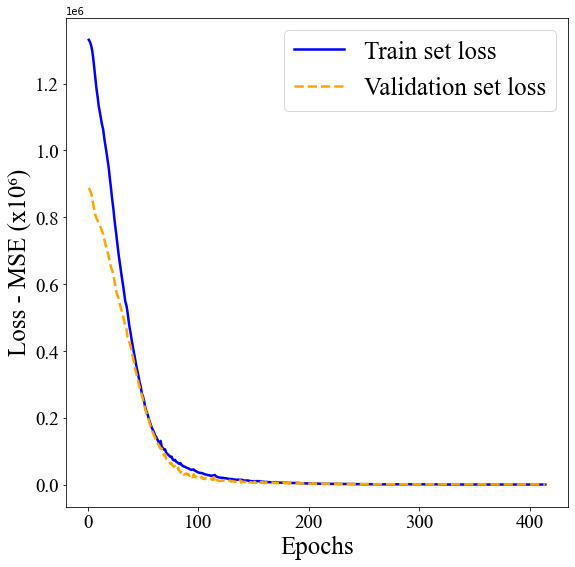

In [17]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

fig3, ax3 = plt.subplots(figsize = (9, 9))

ax3.plot(epochs, loss_values, 'blue', lw=2.5, label='Train set loss')
ax3.plot(epochs, val_loss_values, 'orange', linestyle='--', lw=2.5, label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 25, fontname='Times New Roman')
plt.ylabel('Loss - MSE (x10\N{SUPERSCRIPT SIX})', fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 19, fontname='Times New Roman')
plt.yticks(fontsize = 19, fontname='Times New Roman')
plt.legend(loc='upper right', prop = {'family' : 'Times New Roman', 'size': 25})
#plt.show()
plt.savefig('Fig4(a).jpeg', dpi = 300, bbox_inches = 'tight')

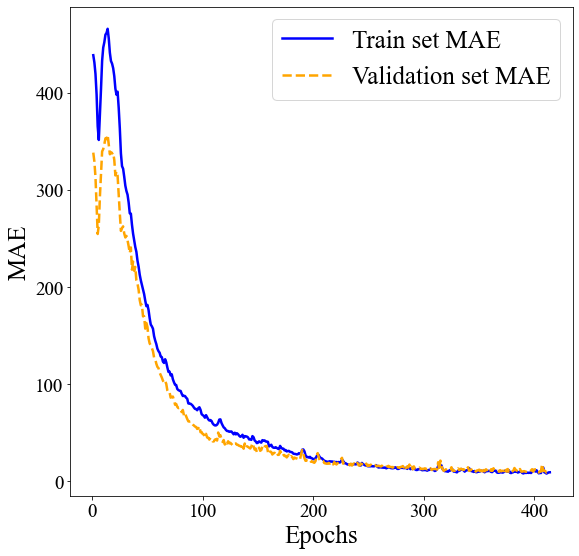

In [18]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)

fig4, ax4 = plt.subplots(figsize = (9, 9))
plt.plot(epochs, loss_values1, 'blue', lw=2.5, label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', linestyle='--',lw=2.5, label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 25, fontname='Times New Roman')
plt.ylabel('MAE', fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 19, fontname='Times New Roman')
plt.yticks(fontsize = 19, fontname='Times New Roman')
plt.legend(loc='upper right', prop = {'family' : 'Times New Roman', 'size': 25})
#plt.show()
plt.savefig('Fig4(b).jpeg', dpi = 300, bbox_inches = 'tight')

In [18]:
print (epochs)

range(1, 191)


3/3 [==============================] - 0s 2ms/step


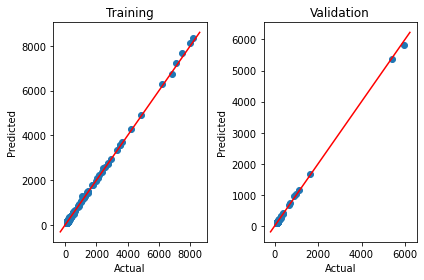

In [19]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [20]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 3ms/step
[[ 105.54  115.43]
 [ 197.53  173.84]
 [ 113.01  119.86]
 [ 105.27  114.76]
 [ 199.33  203.03]
 [ 125.51  128.08]
 [ 659.27  663.22]
 [ 128.93  130.47]
 [ 260.02  242.76]
 [ 145.78  149.23]
 [ 259.65  254.6 ]
 [ 175.85  174.48]
 [ 320.69  317.6 ]
 [ 116.39  122.31]
 [ 184.15  192.32]
 [ 130.71  134.39]
 [ 117.97  123.56]
 [1807.98 1784.86]
 [  98.3   113.1 ]
 [ 160.81  137.43]
 [ 201.77  205.96]
 [2415.03 2351.13]
 [ 107.75  116.61]
 [  95.58  109.67]
 [  99.47  108.77]
 [ 119.65  122.15]
 [ 176.86  167.39]
 [ 209.18  212.75]
 [ 371.91  354.25]
 [ 100.26  111.18]
 [ 117.04  122.51]
 [ 456.97  446.48]
 [ 116.3   122.37]
 [ 659.55  647.73]
 [ 229.66  232.9 ]
 [ 113.26  118.97]
 [ 114.72  110.55]
 [1071.91 1007.45]
 [ 264.57  266.45]
 [ 180.34  180.92]
 [ 109.47  118.21]
 [ 146.13  137.28]
 [ 110.82  118.49]
 [ 138.01  141.88]
 [ 116.19  120.34]
 [ 135.09  136.11]
 [  94.92  109.31]
 [  99.24  112.88]
 [ 113.64  120.46]
 [ 104.17  105.39]

Text(0, 0.5, 'Predicted data')

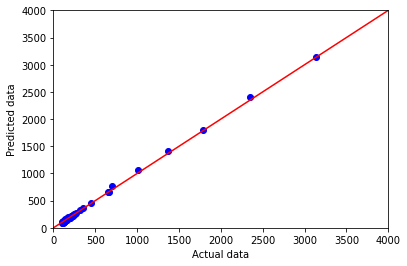

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

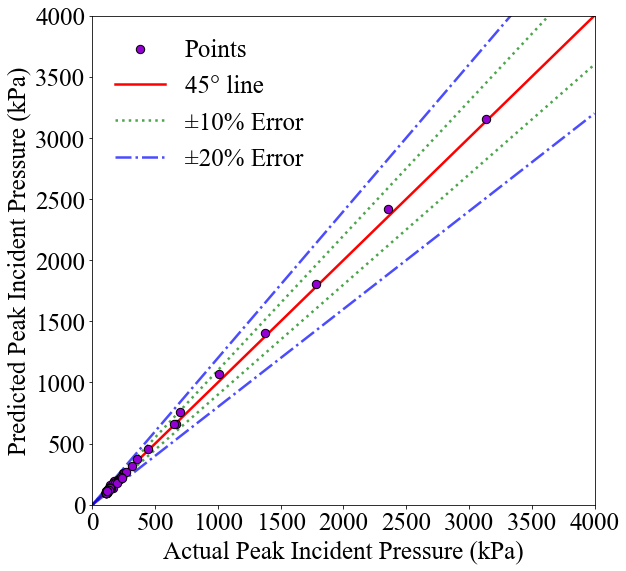

In [22]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='darkviolet',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25, fontname='Times New Roman')
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 25, fontname='Times New Roman')
plt.yticks(fontsize = 25, fontname='Times New Roman')


x1 = np.linspace(0,4000)

#matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
#matplotlib.rcParams['font.family'] = "sans-serif"

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, ':g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,':g', lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.b', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.b',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left', prop = {'family' : 'Times New Roman', 'size': 25}, fancybox = False, edgecolor = 'white')

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Fig5(a).jpeg', dpi = 300, bbox_inches = 'tight')

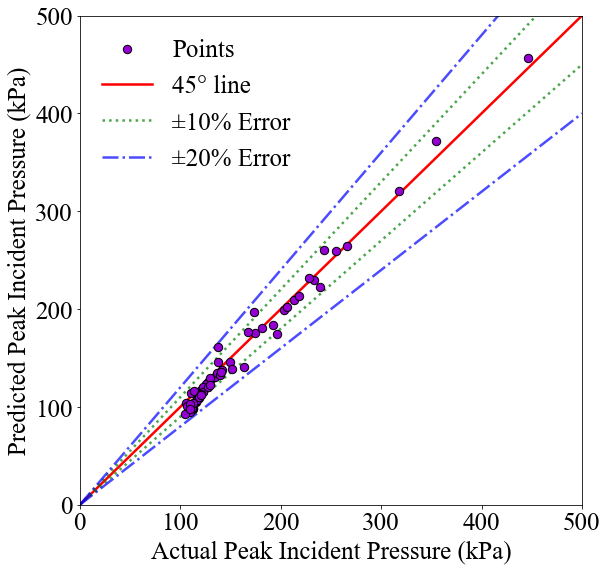

In [23]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='darkviolet',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25, fontname='Times New Roman')
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25, fontname='Times New Roman')
plt.xticks(fontsize = 25, fontname='Times New Roman')
plt.yticks(fontsize = 25, fontname='Times New Roman')



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, ':g', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,':g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.b', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.b',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left', prop = {'family' : 'Times New Roman', 'size': 25}, fancybox = False, edgecolor = 'white')


#plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


plt.savefig('Fig5(b).jpeg', dpi = 300, bbox_inches = 'tight')

In [24]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

12/12 [==============================] - 0s 2ms/step
13.565668377621634
10.385348723620902


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9988518662213377


In [26]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9993431362052955


In [27]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 86.59%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [28]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9987922229081604


In [29]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

16.037865837810784

In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

10.385348723620902